# Analiza e të dhënave të Netflix

Netflix është një nga platformat më të mëdha të transmetimit të filmave dhe serialeve në botë, me një bibliotekë të gjerë që përfshin përmbajtje nga e gjithë bota. Analiza e të dhënave të saj ofron mundësinë për të zbuluar trendet e prodhimit, preferencat e audiencës, vendet më aktive në krijimin e përmbajtjes dhe zhanret më të ndjekura. Ky studim ka si synim të nxjerrë insight-e strategjike për vendimmarrje, optimizim të katalogut dhe orientim të investimeve të ardhshme në prodhim.

## Përmbledhje e Strukturës

- Ngarkimi i librarive të nevojshme
- Ngarkimi i të Dhënave
- Pastrimi i të Dhënave (Data Cleaning)
- Analiza Eksploruese (Exploratory Data Analysis - EDA)
- Insight-e dhe Përfundime
- Rekomandime

### Ngarkimi i librarive

In [99]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px 
import plotly.io as pio


### Ngarkimi i datasetit

In [100]:
df = pd.read_csv("netflix_titles.csv")
df.head(10)

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   
5  80163890  TV Show                                  Apaches   
6  70304989    Movie                                 Automata   
7  80164077    Movie       Fabrizio Copano: Solo pienso en mi   
8  80117902  TV Show                             Fire Chasers   
9  70304990    Movie                              Good People   

                          director  \
0         Richard Finn, Tim Maltby   
1                              NaN   
2                              NaN   
3                              NaN   
4                 Fernando Lebrija   
5                              NaN   
6                      Gabe Ibáñez   
7  Rodrigo Toro, Francisco Schultz   
8                              NaN   
9                Henrik Ruben Genz   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   
5  Alberto Ammann, Eloy Azorín, Verónica Echegui,...   
6  Antonio Banderas, Dylan McDermott, Melanie Gri...   
7                                    Fabrizio Copano   
8                                                NaN   
9  James Franco, Kate Hudson, Tom Wilkinson, Omar...   

                                          country         date_added  \
0        United States, India, South Korea, China  September 9, 2019   
1                                  United Kingdom  September 9, 2016   
2                                   United States  September 8, 2018   
3                                   United States  September 8, 2018   
4                                   United States  September 8, 2017   
5                                           Spain  September 8, 2017   
6          Bulgaria, United States, Spain, Canada  September 8, 2017   
7                                           Chile  September 8, 2017   
8                                   United States  September 8, 2017   
9  United States, United Kingdom, Denmark, Sweden  September 8, 2017   

   release_year    rating  duration  \
0          2019     TV-PG    90 min   
1          2016     TV-MA    94 min   
2          2013  TV-Y7-FV  1 Season   
3          2016     TV-Y7  1 Season   
4          2017     TV-14    99 min   
5          2016     TV-MA  1 Season   
6          2014         R   110 min   
7          2017     TV-MA    60 min   
8          2017     TV-MA  1 Season   
9          2014         R    90 min   

                                           listed_in  \
0                 Children & Family Movies, Comedies   
1                                    Stand-Up Comedy   
2                                           Kids' TV   
3                                           Kids' TV   
4                                           Comedies   
5  Crime TV Shows, International TV Shows, Spanis...   
6  International Movies, Sci-Fi & Fantasy, Thrillers   
7                                    Stand-Up Comedy   
8                    Docuseries, Science & Nature TV   
9                      Action & Adventure, Thrillers   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...  
5  A young journalist is forced into a life of cr...  
6  In a dystopian future, a

In [101]:
# Përmasat e datasetit
df.shape

(6234, 12)

In [102]:
# Variablat e datasetit (Shtyllat e datasetit)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Pastrimi i të Dhënave (Data Cleaning)

In [103]:
# Shikojmë për të dhëna që mungojnë në dataset
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [104]:
# Shikojmë vlerat unike të çdo variabli
df.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

In [105]:
# Shikojmë për të dhëna të përsëritura
df.duplicated().sum()

np.int64(0)

In [106]:
# Bëjmë një kopje të datasetit
data = df.copy()
data.shape

(6234, 12)

In [107]:
# Shiko përqindjen e mungesës për çdo kolonë
missing_percentage = data.isnull().mean() * 100
print(missing_percentage.sort_values(ascending=False))

director        31.584857
cast             9.143407
country          7.635547
date_added       0.176452
rating           0.160411
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64


In [108]:
# Krijojmë një kopje të datasetit
data = data.copy()

# Plotësojmë të dhënat e munguara
data['director'] = data['director'].fillna('Të panjohur')
data['cast'] = data['cast'].fillna('Të panjohur')
data['country'] = data['country'].fillna('Të panjohur')

data = data.dropna(subset=['date_added', 'rating'])


In [109]:
data.head(15)

show_id     type                                           title  \
0   81145628    Movie         Norm of the North: King Sized Adventure   
1   80117401    Movie                      Jandino: Whatever it Takes   
2   70234439  TV Show                              Transformers Prime   
3   80058654  TV Show                Transformers: Robots in Disguise   
4   80125979    Movie                                    #realityhigh   
5   80163890  TV Show                                         Apaches   
6   70304989    Movie                                        Automata   
7   80164077    Movie              Fabrizio Copano: Solo pienso en mi   
8   80117902  TV Show                                    Fire Chasers   
9   70304990    Movie                                     Good People   
10  80169755    Movie                     Joaquín Reyes: Una y no más   
11  70299204    Movie                         Kidnapping Mr. Heineken   
12  80182480    Movie                        Krish Trish and Baltiboy   
13  80182483    Movie        Krish Trish and Baltiboy: Battle of Wits   
14  80182596    Movie  Krish Trish and Baltiboy: Best Friends Forever   

                           director  \
0          Richard Finn, Tim Maltby   
1                       Të panjohur   
2                       Të panjohur   
3                       Të panjohur   
4                  Fernando Lebrija   
5                       Të panjohur   
6                       Gabe Ibáñez   
7   Rodrigo Toro, Francisco Schultz   
8                       Të panjohur   
9                 Henrik Ruben Genz   
10            José Miguel Contreras   
11                 Daniel Alfredson   
12                      Të panjohur   
13      Munjal Shroff, Tilak Shetty   
14      Munjal Shroff, Tilak Shetty   

                                                 cast  \
0   Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                    Jandino Asporaat   
2   Peter Cullen, Sumalee Montano, Frank Welker, J...   
3   Will Friedle, Darren Criss, Constance Zimmer, ...   
4   Nesta Cooper, Kate Walsh, John Michael Higgins...   
5   Alberto Ammann, Eloy Azorín, Verónica Echegui,...   
6   Antonio Banderas, Dylan McDermott, Melanie Gri...   
7                                     Fabrizio Copano   
8                                         Të panjohur   
9   James Franco, Kate Hudson, Tom Wilkinson, Omar...   
10                                      Joaquín Reyes   
11  Jim Sturgess, Sam Worthington, Ryan Kwanten, A...   
12  Damandeep Singh Baggan, Smita Malhotra, Baba S...   
13  Damandeep Singh Baggan, Smita Malhotra, Baba S...   
14  Damandeep Singh Baggan, Smita Malhotra, Deepak...   

                                              country         date_added  \
0            United States, India, South Korea, China  September 9, 2019   
1                                      United Kingdom  September 9, 2016   
2                                       United States  September 8, 2018   
3                                       United States  September 8, 2018   
4                                       United States  September 8, 2017   
5                                               Spain  September 8, 2017   
6              Bulgaria, United States, Spain, Canada  September 8, 2017   
7                                               Chile  September 8, 2017   
8                                       United States  September 8, 2017   
9      United States, United Kingdom, Denmark, Sweden  September 8, 2017   
10                                        Të panjohur  September 8, 2017   
11  Netherlands, Belgium, United Kingdom, United S...  September 8, 2017   
12                                        Të panjohur  September 8, 2017   
13                                        Të panjohur  September 8, 2017   
14                                        Të panjohur  September 8, 2017   

    release_year    rating  duration  \
0           2019     TV-PG    90 min   
1

In [110]:
# Konvertimi i formatit të datës
data["date_added"] = pd.to_datetime(data['date_added'], errors='coerce')

# Nxjerrja e ditës, muajit dhe vitit nga data
data['day_added'] = data['date_added'].dt.day
data['month_added'] = data['date_added'].dt.month
data['year_added'] = data['date_added'].dt.year

# Konvertimi në int
data['year_added'] = data['year_added'].astype('Int64')   
data['day_added'] = data['day_added'].astype('Int64')
data['month_added'] = data['month_added'].astype('Int64')


In [111]:
data.head(5)

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1               Të panjohur   
2               Të panjohur   
3               Të panjohur   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country date_added  release_year  \
0  United States, India, South Korea, China 2019-09-09          2019   
1                            United Kingdom 2016-09-09          2016   
2                             United States 2018-09-08          2013   
3                             United States 2018-09-08          2016   
4                             United States 2017-09-08          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  day_added  month_added  \
0  Before planning an awesome wedding for his gra...          9            9   
1  Jandino Asporaat riffs on the challenges of ra...          9            9   
2  With the help of three human allies, the Autob...          8            9   
3  When a prison ship crash unleashes hundreds of...          8            9   
4  When nerdy high schooler Dani finally attracts...          8            9   

   year_added  
0        2019  
1        2016  
2        2018  
3        2018  
4        2017

Dataseti i përdorur përmban 6,234 rreshta dhe 12 kolona me informacion mbi titujt e filmave dhe serialeve në Netflix. Fushat kryesore përfshijnë:
- show_id – Identifikues unik për secilin titull
- type – Tipi i përmbajtjes (Movie ose TV Show)
- title – Titulli i veprës
- director / cast – Regjisori dhe aktorët 
- country – Vendi i prodhimit
- date_added / release_year – Data e shtimit dhe viti i publikimit
- rating – Klasifikimi sipas moshës (p.sh. TV-MA, TV-14)
- duration – Kohëzgjatja ose numri i sezoneve
- listed_in – Zhanret / kategoritë
- description – Përshkrimi i shkurtër

Pas pastrimit, të dhënat me mungesa u plotësuan, duke ruajtur integritetin e dataset-it.
Gjithashtu u konvertua në formatin e duhur dhe data e shtimit në Netflix.

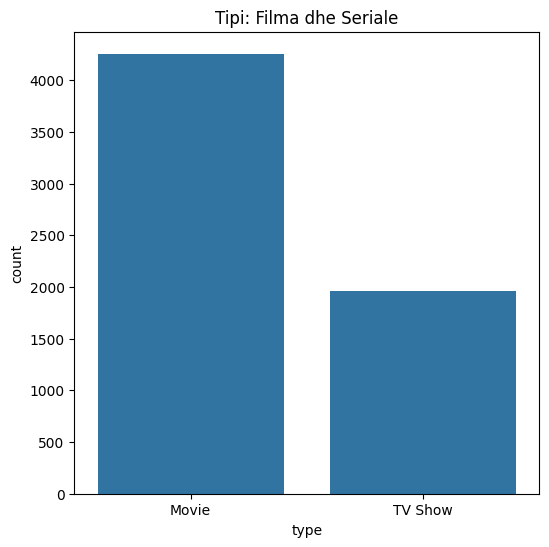

In [112]:
# Analiza e shpërndarjes së llojit të përmbajtjes: Filma dhe Seriale në Netflix
plt.figure(figsize=(6,6))
sns.countplot(x='type', data=data)
plt.title('Tipi: Filma dhe Seriale')
plt.show()


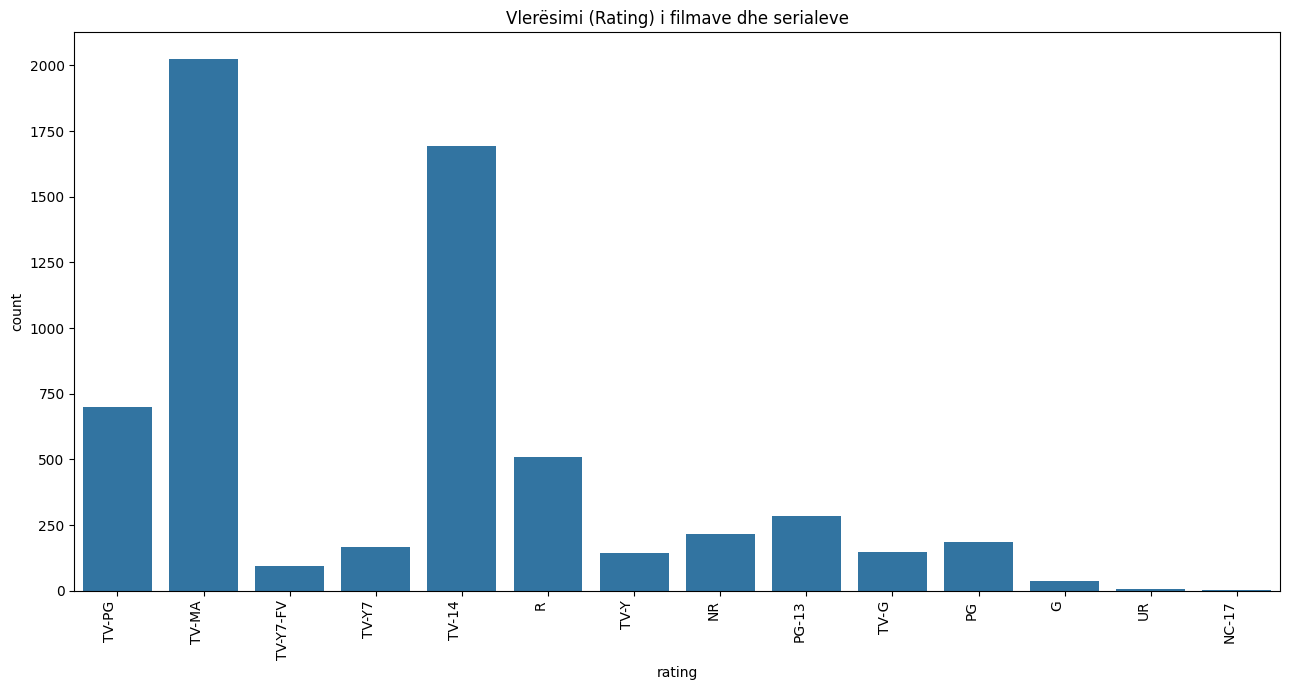

In [113]:
plt.figure(figsize=(13, 7))
ax = sns.countplot(x='rating', data=data)

# Rrotullo etiketat në boshtin x
plt.xticks(rotation=90, ha='right')

plt.title('Vlerësimi (Rating) i filmave dhe serialeve')
plt.tight_layout()
plt.show()

<Axes: xlabel='release_year', ylabel='count'>

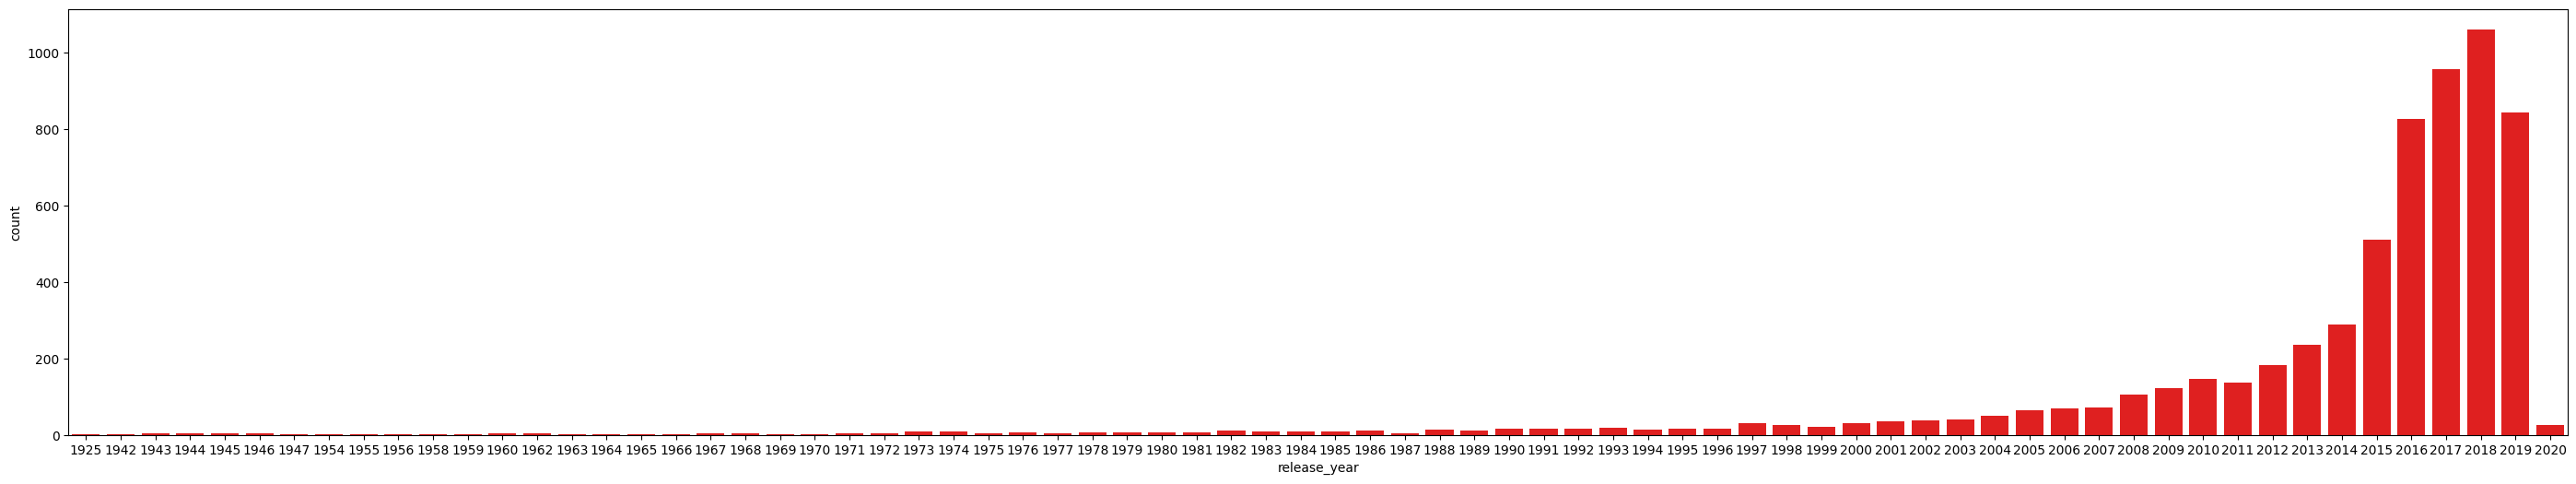

In [114]:
plt.figure(figsize = (35,6))
sns.countplot(x='release_year',data = data, color= "red")

Siç mund ta shohim, shumica e filmave dhe serialeve televizivë në Netflix janë publikuar në dekadën e fundit, ndërsa shumë pak janë publikuar më herët.

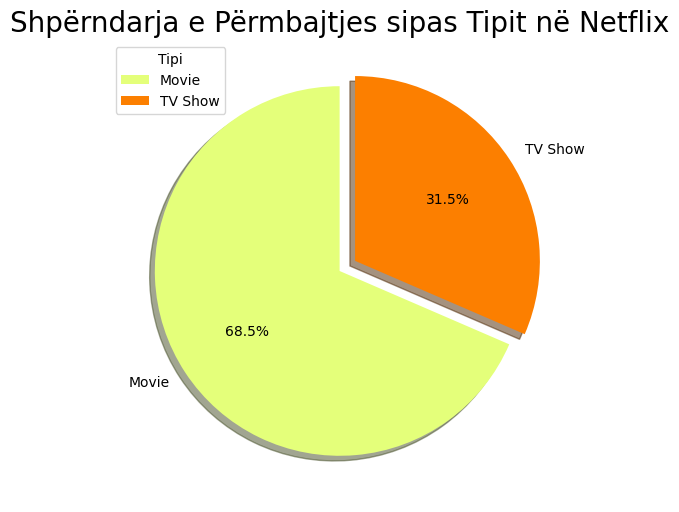

In [115]:
labels = ['Movie', 'TV Show']  
size = data['type'].value_counts() 
colors = plt.cm.Wistia(np.linspace(0, 1, 2)) 
explode = [0, 0.1]  

plt.figure(figsize=(6, 6)) 
plt.pie(size, labels=labels, colors=colors, explode=explode, shadow=True, startangle=90, autopct='%1.1f%%')
plt.title('Shpërndarja e Përmbajtjes sipas Tipit në Netflix', fontsize=20)
plt.legend(title='Tipi')
plt.show()


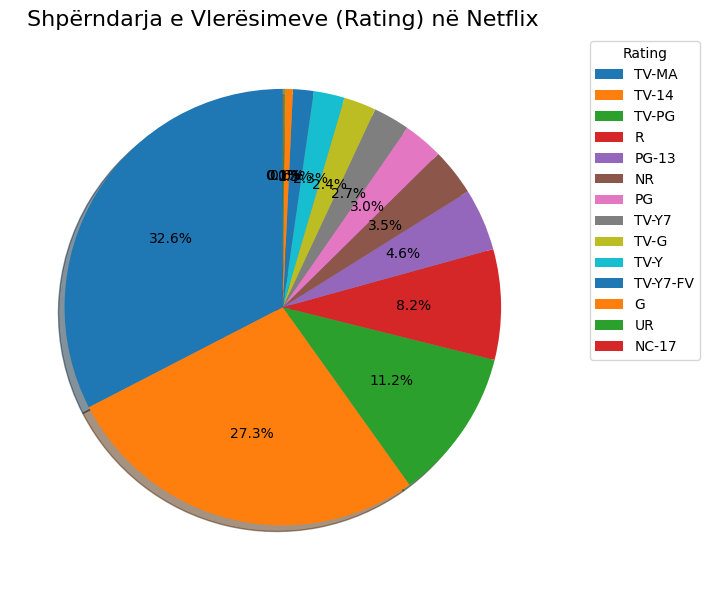

In [116]:
plt.figure(figsize=(8,6))
ax = data['rating'].value_counts().plot.pie(
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    labels=None  # Hiq emrat nga segmentet
)
plt.legend(labels=data['rating'].value_counts().index, title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Shpërndarja e Vlerësimeve (Rating) në Netflix', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()


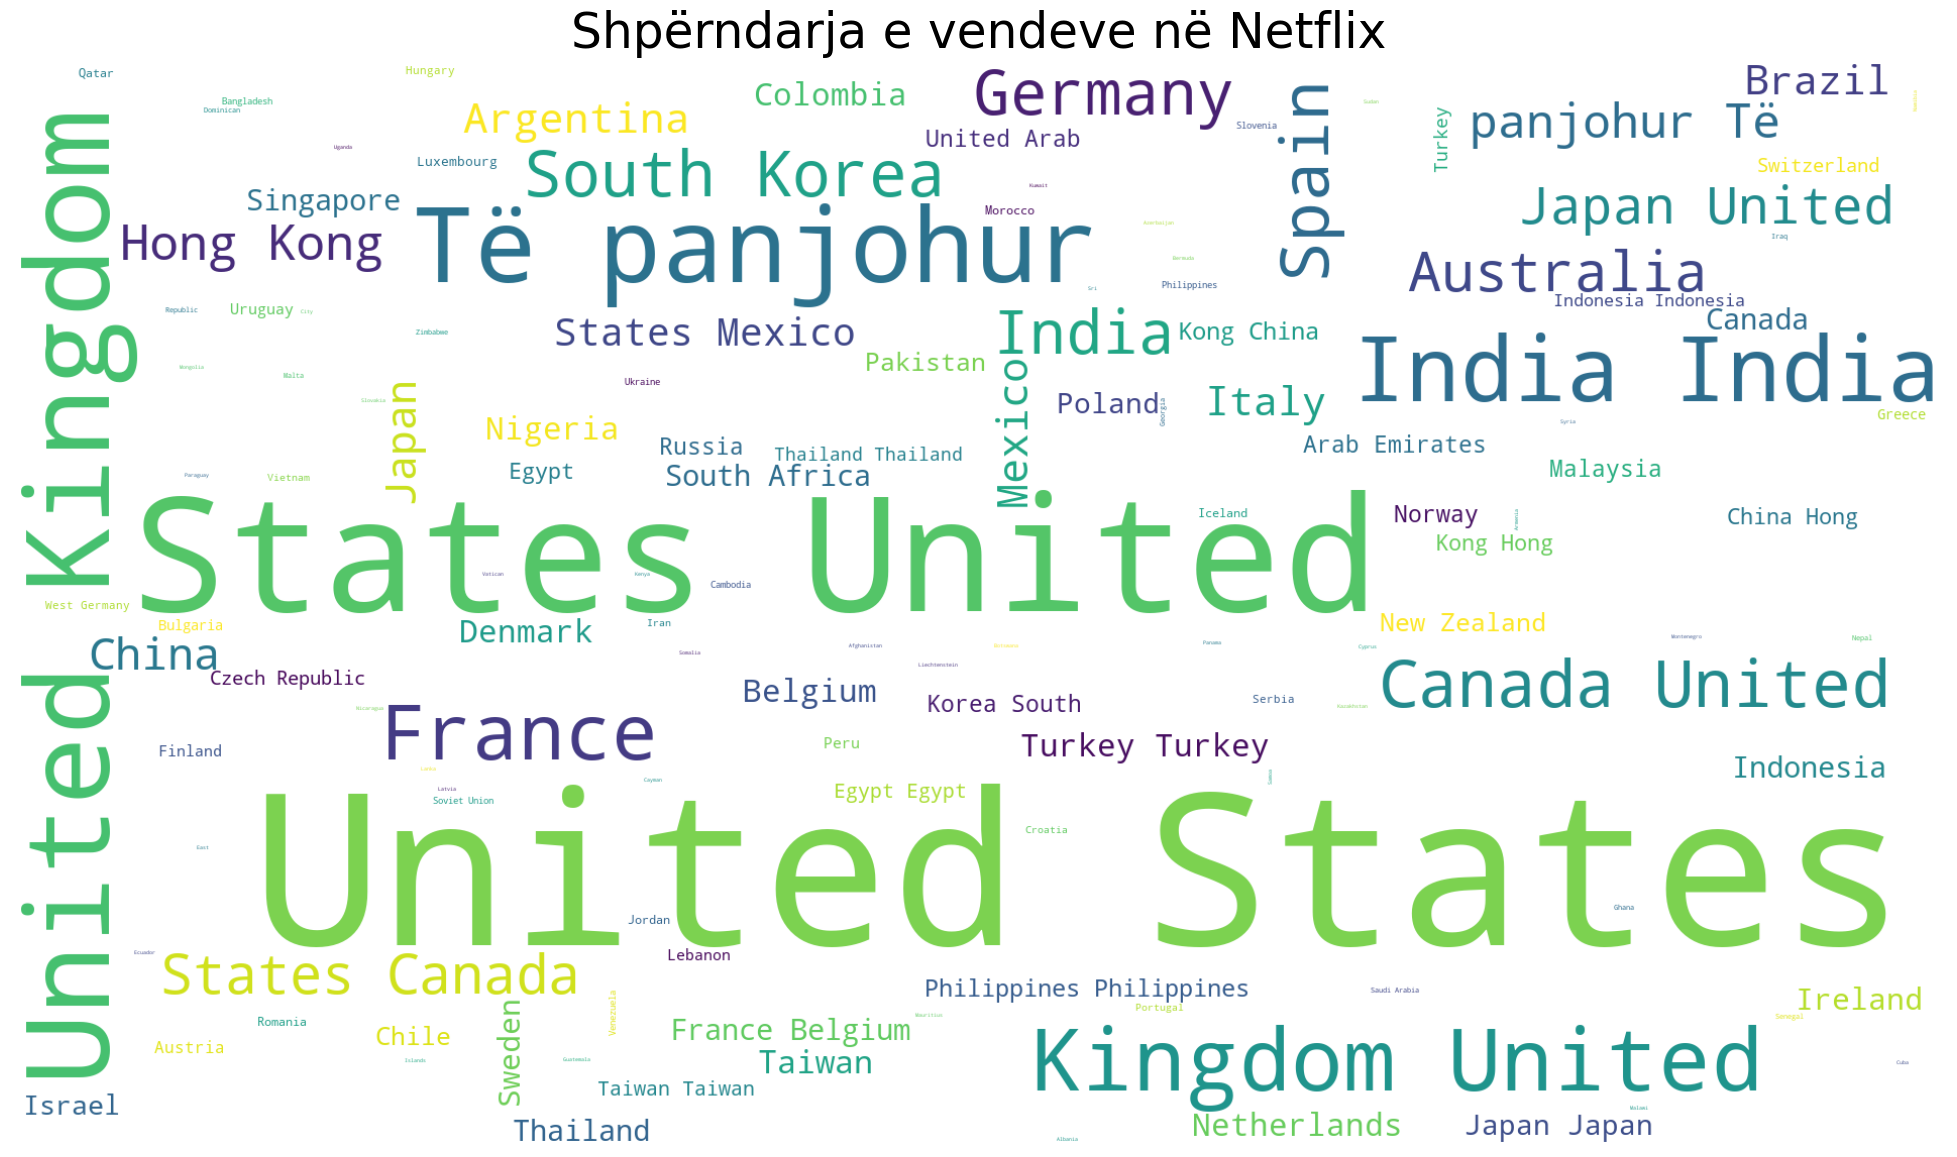

In [117]:
plt.figure(figsize=(25,15))  # Madhësia e figurës

# Krijojmë WordCloud duke bashkuar të gjitha vendet në një string të vetëm
text = " ".join(data['country'].dropna().astype(str))  # Sigurohemi që nuk ka NaN dhe janë stringje

wordcloud = WordCloud(
    background_color='white',
    width=1920,
    height=1080
).generate(" ".join(data.country))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Shpërndarja e vendeve në Netflix', fontsize=35)

plt.savefig('country.png', bbox_inches='tight')  # Ruajmë figurën pa margjina të panevojshme
plt.show()



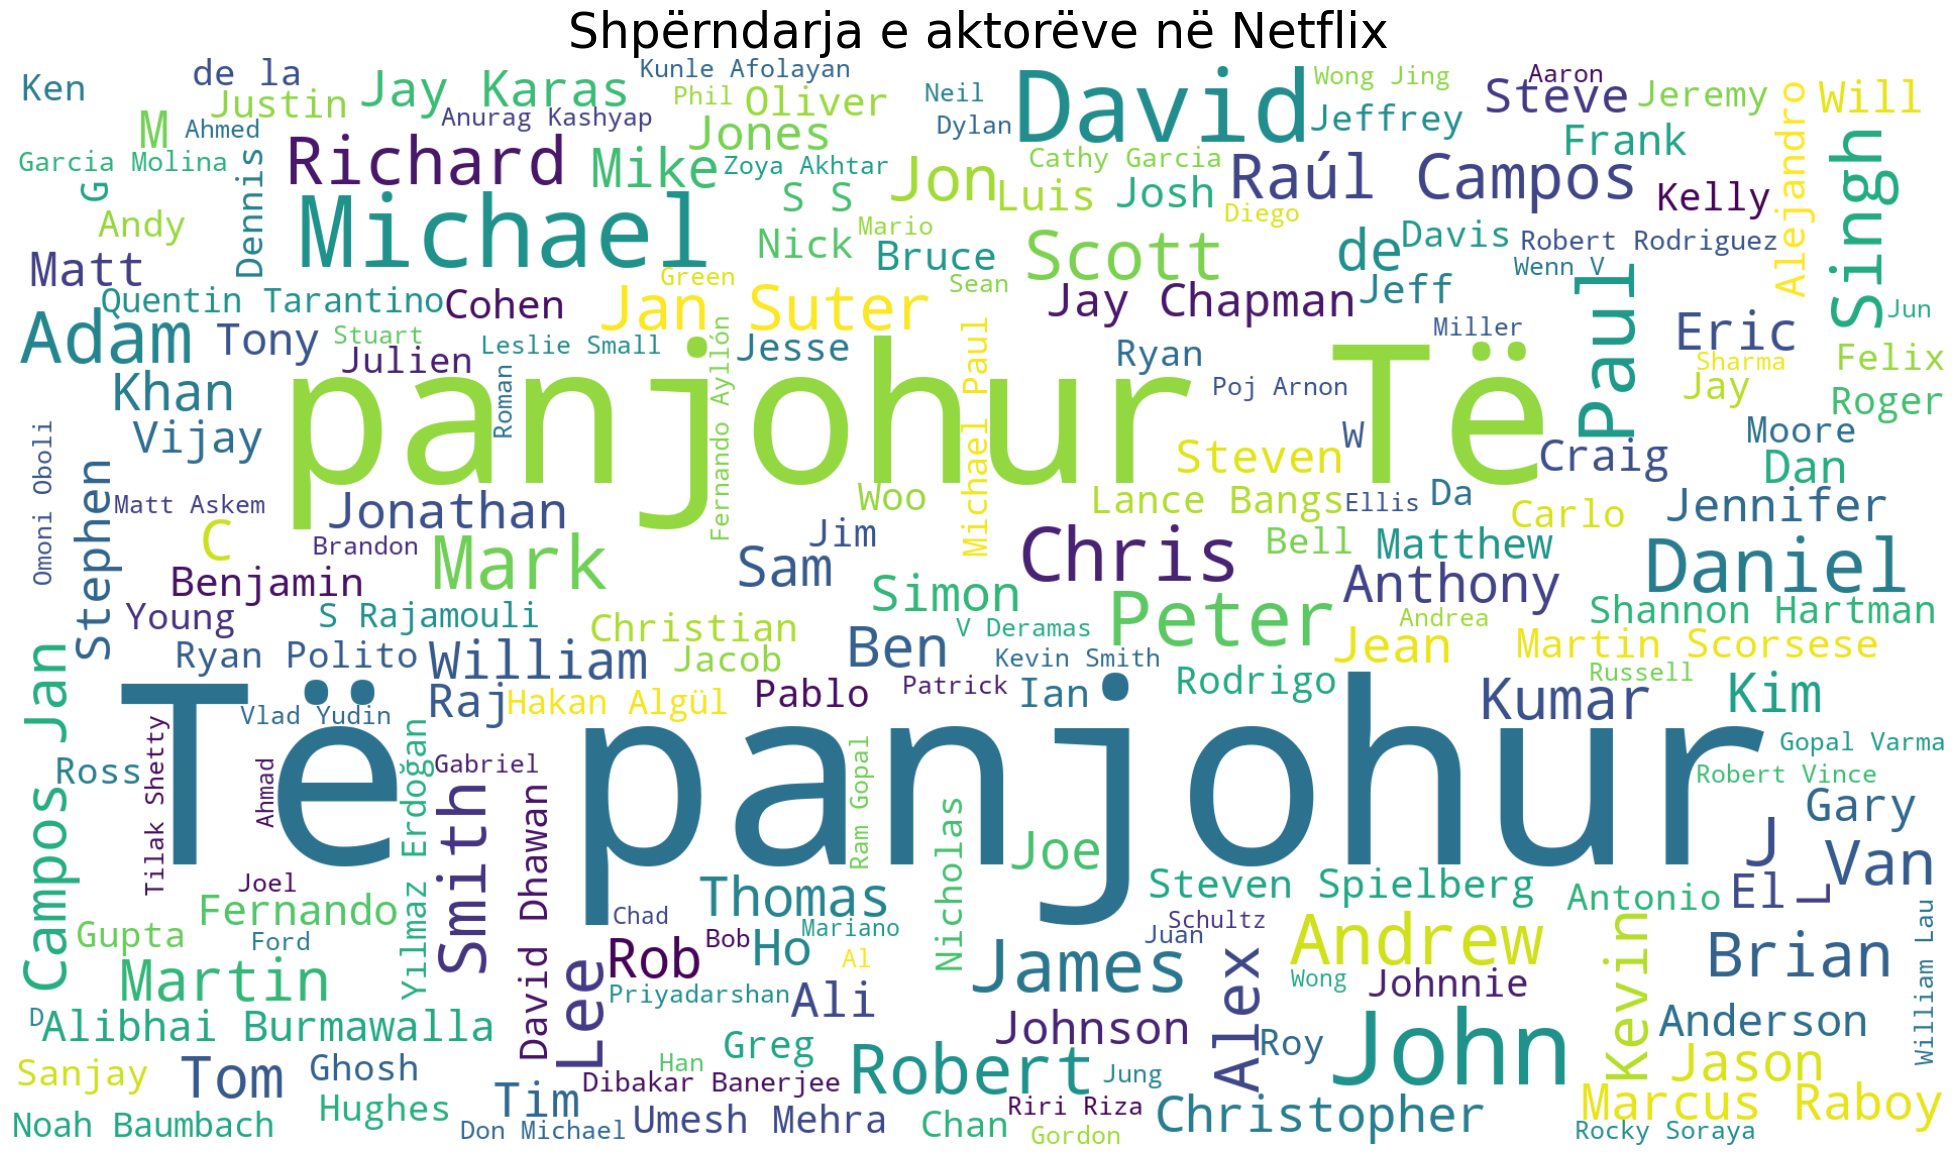

In [118]:
plt.figure(figsize=(25,15))

wordcloud = WordCloud(
    background_color='white',
    width=1920,
    height=1080,
    colormap= "viridis"
).generate(" ".join(data.director))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Shpërndarja e aktorëve në Netflix', fontsize=35)

plt.savefig('cast.png', bbox_inches='tight')
plt.show()

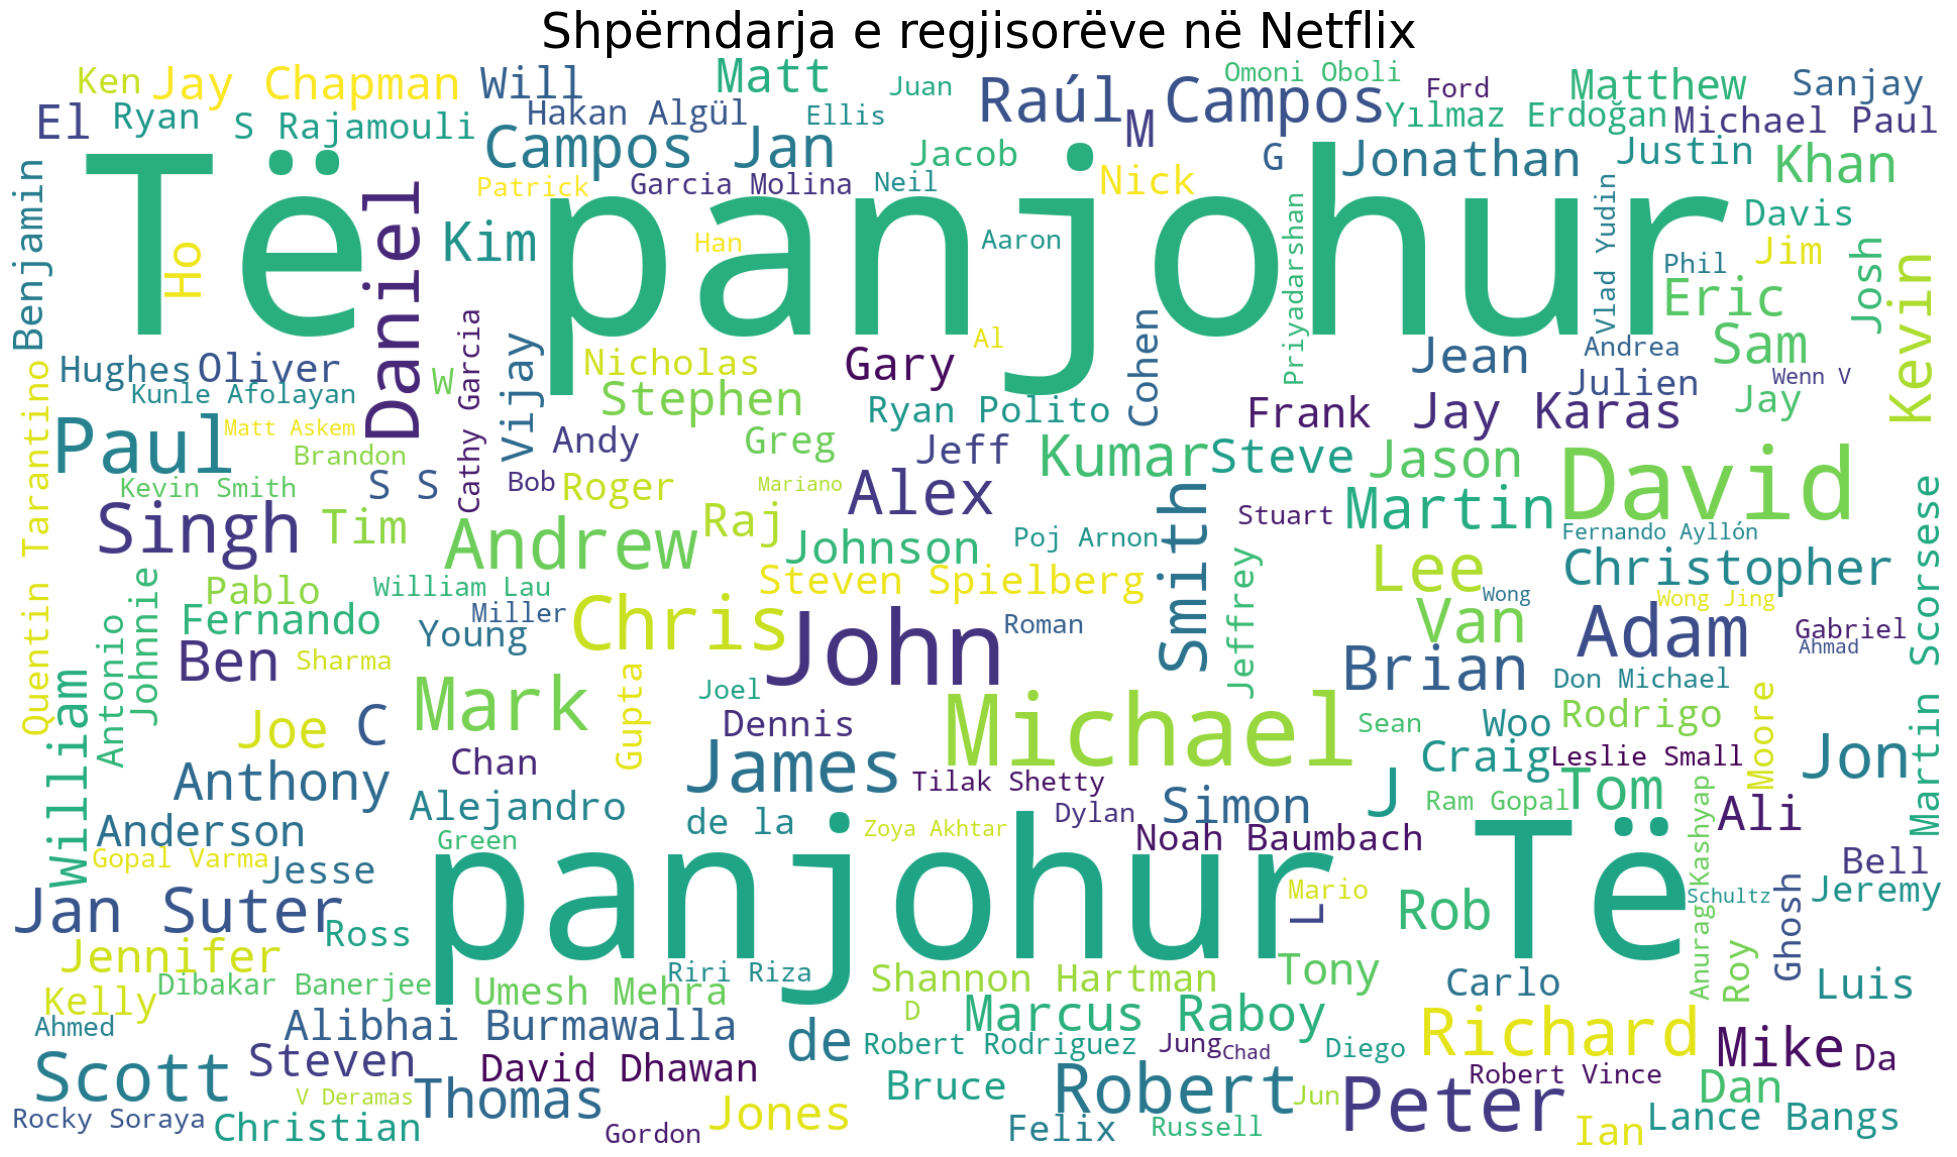

In [119]:
plt.figure(figsize=(25,15))

wordcloud = WordCloud(
    background_color='white',
    width=1920,
    height=1080,
    colormap= "viridis"
).generate(" ".join(data.director))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Shpërndarja e regjisorëve në Netflix', fontsize=35)

plt.savefig('director.png', bbox_inches='tight')
plt.show()

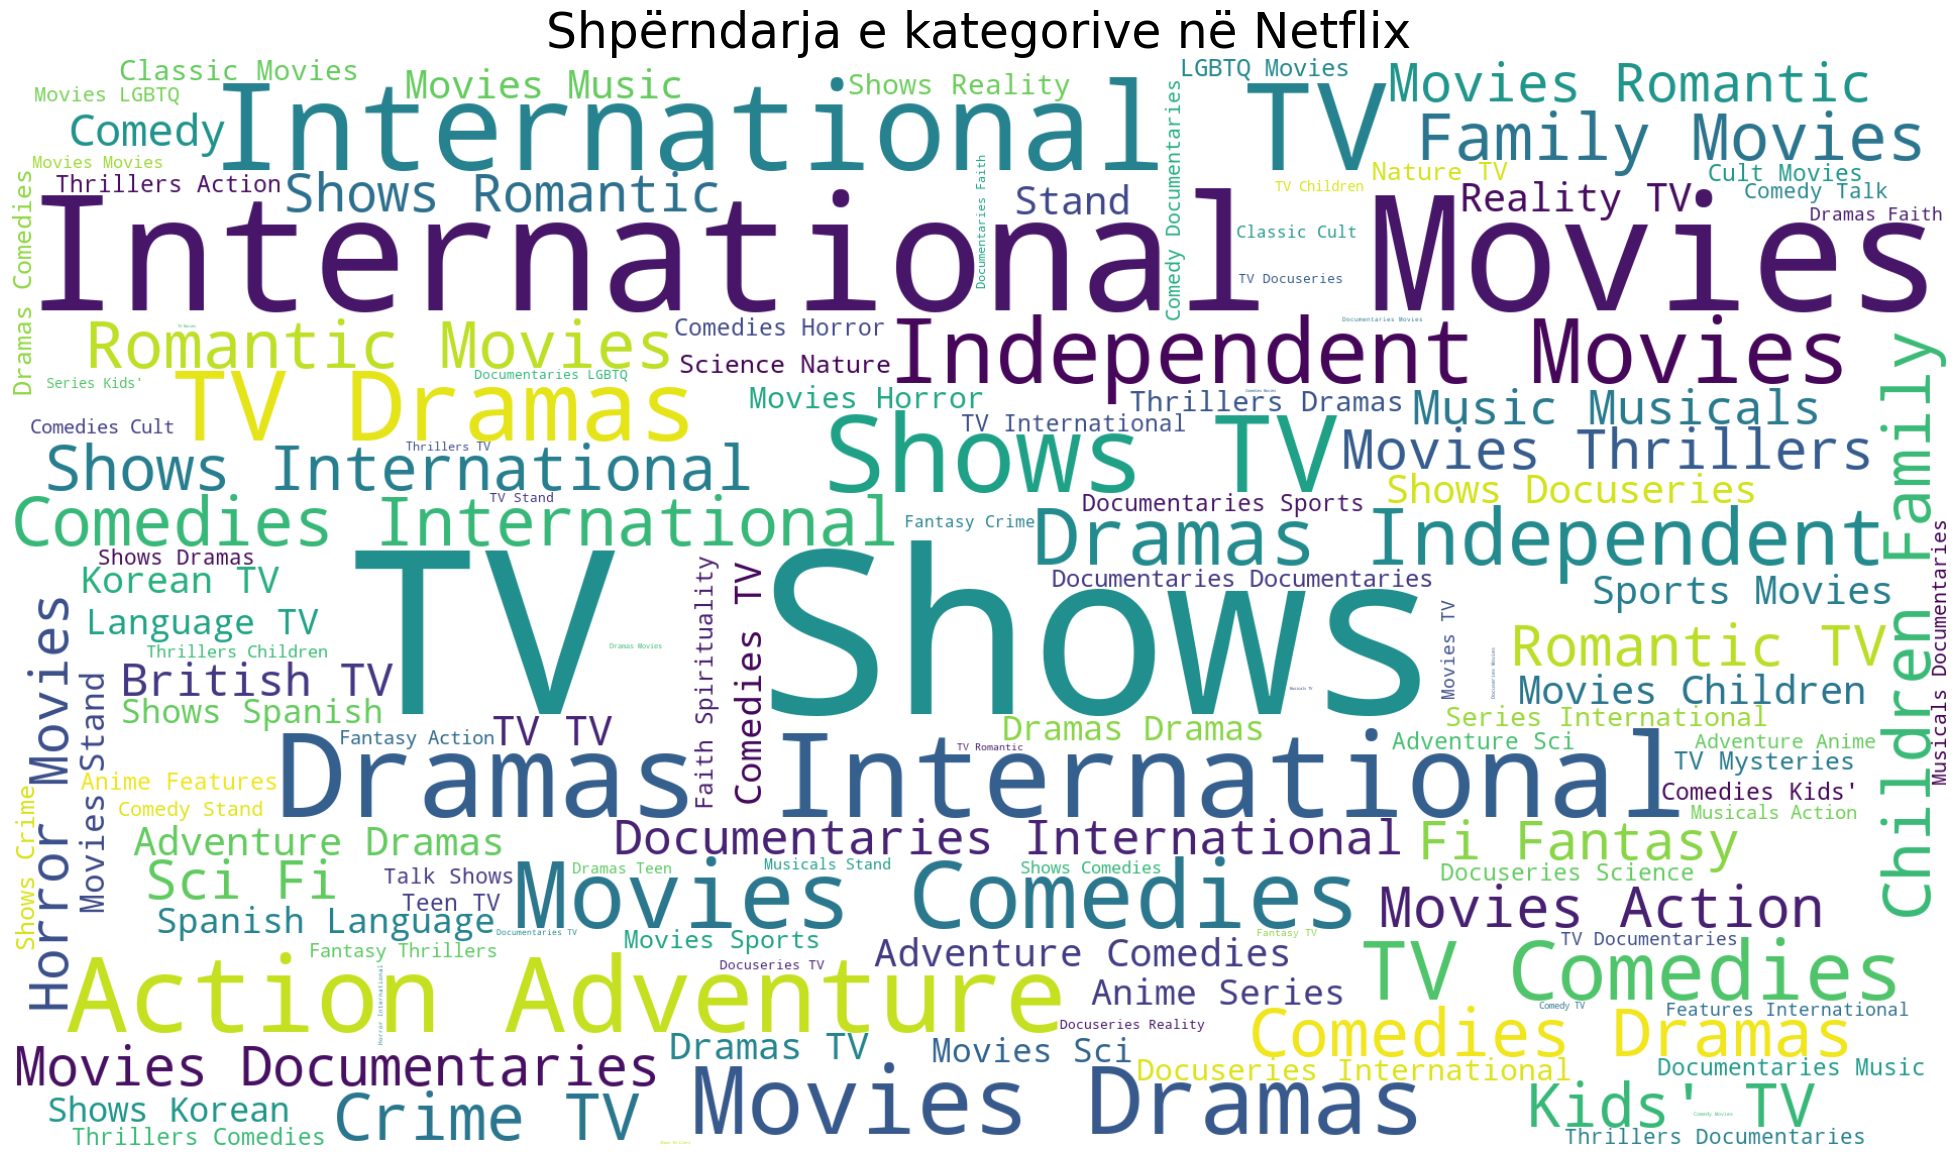

In [120]:
plt.figure(figsize=(25,15))

wordcloud = WordCloud(
    background_color='white',
    width=1920,
    height=1080,
    colormap= "viridis"
).generate(" ".join(data.listed_in))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Shpërndarja e kategorive në Netflix', fontsize=35)

plt.savefig('category.png', bbox_inches='tight')
plt.show()

In [121]:
old = data.sort_values("release_year", ascending = True) #oldest movies available on netflix
old = old[old['duration'] != ""]
old[['title', "release_year"]][:15]

title  release_year
4292                 Pioneers: First Women Filmmakers*          1925
2011                                    Prelude to War          1942
2013                              The Battle of Midway          1942
2026                   WWII: Report from the Aleutians          1943
2022     Undercover: How to Operate Behind Enemy Lines          1943
2023                Why We Fight: The Battle of Russia          1943
2021                                  Tunisian Victory          1944
2019                                 The Negro Soldier          1944
2017  The Memphis Belle: A Story of a\nFlying Fortress          1944
2012                                        San Pietro          1945
2009                          Nazi Concentration Camps          1945
2005                           Know Your Enemy - Japan          1945
2930                                      The Stranger          1946
4079               Pioneers of African-American Cinema          1946
2006                                Let There Be Light          1946

In [122]:
tag = "Stand-Up Comedy" #standup shows on Netflix
data["relevant"] = data['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
com = data[data["relevant"] == 1]
com[com["country"] == "United States"][["title", "country","release_year"]].head(10)

title        country  \
53                              Marc Maron: Too Real  United States   
113                                Def Comedy Jam 25  United States   
126                      Jeff Dunham: Beside Himself  United States   
134                Iliza Shlesinger: Confirmed Kills  United States   
181                            Jerry Before Seinfeld  United States   
202  Sebastian Maniscalco: What's Wrong with People?  United States   
210      Cedric the Entertainer: Live from the Ville  United States   
260                        Norm Macdonald Has a Show  United States   
288                   Jeff Dunham: Relative Disaster  United States   
289                         Daniel Sloss: Live Shows  United States   

     release_year  
53           2017  
113          2017  
126          2019  
134          2016  
181          2017  
202          2012  
210          2016  
260          2018  
288          2017  
289          2018

In [123]:
tag = "Kids' TV" #Kids TV shows on Netflix
data["relevant"] = data['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
com = data[data["relevant"] == 1]
com[com["country"] == "United States"][["title", "country","release_year"]].head(10)

title        country  release_year
2                  Transformers Prime  United States          2013
3    Transformers: Robots in Disguise  United States          2016
64                             Ben 10  United States          2016
70                      We Bare Bears  United States          2017
175        Kulipari: An Army of Frogs  United States          2016
203            The Last Kids on Earth  United States          2019
328  Transformers Rescue Bots Academy  United States          2019
375  LEGO Elves: Secrets of Elvendale  United States          2017
434             StoryBots Super Songs  United States          2016
458                      Raising Dion  United States          2019

In [124]:
df_countries = pd.DataFrame(data.country.value_counts().reset_index().values, columns=["country", "count"])
df_countries.head()

country count
0   United States  2023
1           India   777
2     Të panjohur   471
3  United Kingdom   347
4           Japan   174

In [125]:
fig = px.choropleth(
    df_countries,
    locations="country",
    locationmode='country names',
    color="count",
    color_continuous_scale="Viridis",
    title="Shpërndarja e përmbajtjes në Netflix sipas vendeve"
)
pio.renderers.default = "notebook_connected"
fig.show()

In [126]:
# Heqja e vlerave null nga kolona 'country'
df = df[df['country'].notna()]

# Shpërndarja e rreshtave që kanë më shumë se një shtet (të ndara me presje)
df_countries = df.copy()
df_countries['country'] = df_countries['country'].apply(lambda x: x.split(', '))
df_countries = df_countries.explode('country')

# Numërimi i përmbajtjeve sipas shteti
country_counts = df_countries['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Vizualizimi me Plotly
fig = px.bar(country_counts.sort_values('count', ascending=False),
             x='country',
             y='count',
             color='count',
             title='Numri i Filmave dhe Serive në Netflix sipas Shtetit',
             labels={'count': 'Numri i përmbajtjeve', 'country': 'Shteti'},
             height=600)

fig.update_layout(xaxis_tickangle=-45)
pio.renderers.default = "notebook_connected"
fig.show()



In [127]:
# Ndaj vendet që janë të ndara me presje (p.sh., "United States, Canada")
countries = df['country'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
df_expanded = df.drop('country', axis=1).join(countries.rename('country'))

# Llogarit sa filma/seriale ka çdo vend
country_counts = df_expanded['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Vizualizo me hartë globale
fig = px.choropleth(
    country_counts,
    locations='country',
    locationmode='country names',
    color='count',
    hover_name='country',
    color_continuous_scale='OrRd',
    title='Numri i Filmave/Serialeve në Netflix për çdo Shtet'
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=True))
pio.renderers.default = "notebook_connected"  
fig.show()

## **Analiza e rezultateve dhe interpretimi i vizualizimeve**

Nga analiza eksploruese e dataset-it të Netflix dalin disa prirje të qarta, të cilat theksohen më shumë kur shihen në kombinim me grafikët përkatës:

1. **Shpërndarja sipas tipit të përmbajtjes**
   Grafiku *countplot* dhe *pie chart* tregojnë se **filmat përbëjnë rreth 70% të katalogut**, ndërsa **serialet rreth 30%**. Ky raport pasqyron orientimin e Netflix drejt prodhimeve me kohëzgjatje të shkurtër (filma), të cilat kërkojnë më pak angazhim nga shikuesi, por gjithashtu krijojnë mundësi për konsum të shpejtë dhe të shpeshtë të përmbajtjes.

2. **Evolucioni në kohë i publikimeve**
   Histogrami i viteve të publikimit tregon një **rritje të fortë pas vitit 2010**, me kulm mes viteve 2018–2020. Ky trend lidhet me strategjinë e zgjerimit global të Netflix dhe investimet e mëdha në përmbajtje origjinale. Rënia pas vitit 2020 mund të jetë pasojë e cikleve të prodhimit të ndikuara nga pandemia Covid-19.

3. **Klasifikimi sipas moshës (Rating)**
   Grafiku *pie chart* për rating-un tregon dominim të kategorive **TV-MA** dhe **TV-14**, që përfaqësojnë përmbajtje për të rritur dhe pak mbi moshën e adoleshencës. Kjo tregon një fokus të qartë te audienca e rritur, me përmbajtje që shpesh trajton tema më serioze ose më komplekse.

4. **Shpërndarja gjeografike e përmbajtjes**
   Hartat *choropleth* dhe grafiku shtylla nxjerrin në pah dominimin e SHBA-së me mbi **2000 tituj**, e ndjekur nga India (838) dhe Mbretëria e Bashkuar (601). Megjithatë, diversiteti kulturor i katalogut është i dukshëm, me kontribute nga mbi **550 vende** dhe rajone. Kjo përzierje shton vlerën e Netflix si platformë globale, por gjithashtu zbulon tregje ku prezenca e përmbajtjes është ende e kufizuar.

5. **Zhanret dhe titujy**
   WordCloud-et për fushat *listed\_in*, *director*, *cast* dhe *country* nxjerrin në pah titujt dhe emrat më të përsëritur. Zhanret si **Dramas**, **International Movies**, dhe **Comedies** dominojnë, duke reflektuar kërkesën e lartë të publikut për histori emocionale dhe të lidhura me kulturën lokale.
   Nga ana tjetër, WordCloud për vendet dhe regjisorët tregon qartë se disa tregje kanë më shumë prodhueshmëri se të tjerët, duke reflektuar kapacitetin prodhues dhe marrëveshjet e licencimit.

6. **Prania e titujve historikë**
   Analiza e titujve më të vjetër tregon se katalogu i Netflix përfshin edhe filma dokumentarë dhe prodhime historike që datojnë deri në vitin **1925**, duke e bërë platformën jo vetëm një ofrues të përmbajtjes së re, por edhe një arkiv kulturor.

**Analizë strategjike**

* Dominimi i filmave mbi serialet mund të lidhet me strategjinë për të mbajtur konsumatorët aktivë me përmbajtje të shpejtë, por mund të lërë hapësirë për rritjen e serialeve të cilat gjenerojnë angazhim afatgjatë.
* Pesha e lartë e SHBA-së në katalog tregon një varësi të madhe nga prodhimet perëndimore, duke sugjeruar nevojën për të rritur investimet në tregjet me rritje të shpejtë si Afrika dhe Amerika Latine.
* Fokusimi tek audienca e të rriturve përputhet me trendet e konsumit të përmbajtjes, por krijon mundësinë për zgjerim të përmbajtjes familjare dhe për fëmijë për të tërhequr mosha të reja të tregut.


## **Përmbledhje përfundimtare**

Analiza e dataset-it të Netflix, me 6,234 tituj nga mbi 550 vende, tregon se platforma ka një katalog të gjerë dhe global, por me një dominim të dukshëm të filmave mbi serialet dhe të prodhimeve nga SHBA. Shumica e përmbajtjes është publikuar në dekadën e fundit, me një rritje të shpejtë pas vitit 2015, e ndikuar nga zgjerimi global dhe investimet në përmbajtje origjinale. Klasifikimet *TV-MA* dhe *TV-14* tregojnë fokusin tek audienca e rritur dhe adoleshenca, ndërsa zhanret më të pranishme janë dramat dhe filmat ndërkombëtarë.


## **Insight-e kryesore**

1. **Dominimi i filmave (70%)** mbi serialet (30%) mund të jetë një strategji për konsum të shpejtë të përmbajtjes, por redukton potencialin e angazhimit afatgjatë që ofrojnë serialet.
2. **Prodhimi i përqendruar gjeografikisht** – SHBA, India dhe Mbretëria e Bashkuar dominojnë katalogun, duke lënë hapësirë për rritje në tregje të tjera.
3. **Orientimi drejt audiencës së rritur** – pjesa më e madhe e përmbajtjes ka klasifikime të larta të moshës, duke reflektuar temat dhe zhanret e përzgjedhura.
4. **Zhanret ndërkombëtare në rritje** – kategoritë si International Movies dhe Dramas po regjistrojnë një kërkesë të lartë nga audienca, duke reflektuar interesin në rritje për histori me sfond të pasur kulturor dhe narrativë të larmishme, që ofrojnë perspektiva të ndryshme nga ato tradicionale të tregut perëndimor
5. **Prania e titujve historikë** e kthen Netflix-in në një arkiv kulturor, duke pasuruar diversitetin e katalogut.



## **Rekomandime strategjike**

1. **Zgjerimi i prodhimit të serialeve origjinale** – për të rritur angazhimin dhe kohëzgjatjen e abonimit të përdoruesve.
2. **Zgjerimi i katalogut gjeografik** – investime në tregjet në rritje si Afrika, Lindja e Mesme dhe Amerika Latine për të rritur bazën e abonentëve.
3. **Balancimi i përmbajtjes për grupmosha të ndryshme** – rritja e katalogut për familjet dhe fëmijët për të tërhequr segmente të reja.
4. **Përmirësimi i të dhënave të informacionit** – plotësimi i mungesave për regjisorët, aktorët dhe vendin e prodhimit për të ndihmuar në analiza më të sakta.
5. **Shfrytëzimi i titujve historikë** – krijimi i një seksioni të dedikuar për “Classic & Historical Films” që mund të tërheqë një audiencë të veçantë.
6. **Përdorimi i dashboard-eve interaktive** – për monitorim në kohë reale të performancës së përmbajtjes dhe identifikim të shpejtë të trendeve.

# **Punoi : Sami Hoxha**